# 결정 트리

## 붖꽃 분류하기
- 로지스틱 회귀를 이용한 분류

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# 붓꽃 데이터 세트 로딩
iris = load_iris()
iris_label = iris.target
iris_data = iris.data

In [3]:
# 붓꽃 데이터 DataFrame으로 변환 
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label']= iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# counts : 원소수
# mean : 평균
# std : 표준편차
# min/max/사분위수
iris_df.describe() # 기본 통계량을 제공하는 함수(컴럼type이 object는 계산하지 않음)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- 크기 차이가 크지는 않지만 있기 때문에 표준화 필요해 보임

In [5]:
from sklearn.model_selection import train_test_split

# Data 분할해주기
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.3, random_state=11)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_t_scl = ss.transform(X_train)
X_v_scl = ss.transform(X_test)

In [7]:
# 2개의 품종만 추출
# train data 에 대해서
two_indexes = (y_train == 0)|(y_train == 2)
X_t_two = X_t_scl[two_indexes]
y_t_two = y_train[two_indexes]

# test data에 대해서
two_indexes = (y_test == 0)|(y_test == 2)
X_v_two = X_v_scl[two_indexes]
y_v_two = y_test[two_indexes]

In [8]:
from sklearn.linear_model import LogisticRegression
lr_cfg = LogisticRegression()
lr_cfg.fit(X_t_two, y_t_two)

print(lr_cfg.score(X_t_two, y_t_two))
print(lr_cfg.score(X_v_two, y_v_two))

1.0
1.0


### 설명하기 쉬운 모델과 어려운 모델

In [9]:
print(lr_cfg.coef_, lr_cfg.intercept_)

[[ 0.79920015 -0.72157581  1.30467046  1.33148205]] [0.57203178]


- 이 모델은
- (꽃받침길이 * 0.79920015 + 꽃받침넓이 * -0.72157581 +  꽃잎길이 * 1.30467046 + 꽃잎 넓이 * 1.33148205) + 0.57203178 의 값이 
    - 정확도 1.0%
- 설명하기기 어렵다
    - 추측하면 꽃잎길이와 꽃잎 넓이가 크면 2번 품종일 가능성이 높고
    - 꽃받침 넓이가 작을수록 0번 품종일 가능성이 높다
- 대부분의 머신러닝 모델은 설명하기가 어렵다
- 순서도를 그리듯이 설명할 수 있는 모델은??????

## 결정 트리(Decision Tree) 
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 알고리즘
- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘으로 분류와 회귀 문제에서 널리 사용
- 특정기준(질문)에 따라서 데이터를 구분
- 가장 쉬운 규칙 표현 방법 : if/else 기반 (스무고개 게임과 유사)함
- 회귀 방식 x
- 여러 컬럼 중 최적의 기준을 찾는다.

### 의사결정나무의 타입

- 분류 나무
  
    - 범주형 목표 변수를 기준으로 마디를 나눔
    - 끝마디에 포함된 자료의 범주가 분류 결과 값이 됨


- 회귀 나무

    - 연속형 목표 변수를 기준으로 마디를 나눔
    - 끝마디에 포함된 자료의 평균값이 각 끝마디의 회귀 값이 됨  

### Tree 구조
- 전체적인 모양이 나무를 뒤집어 놓은 것과 닮았다고 해서 붙여진 이름
- 결정트리에서 질문이나 네모상자를 노드(Node) 라고 함
- 맨 위의 노드(첫 질문)를 Root Node
- 각 질문에 대한 마지막 노드를 Leaf Node : 결정된 클래스 값 
- Decision Node(규칙 노드) : 규칙 조건  
- 새로운 규칙 조건마다 Sub Tree 생성
- 조건을 계속 수행해서 불순도가 0일 때, 더 이상 분할하지 않도록 하는 알고리즘이다.
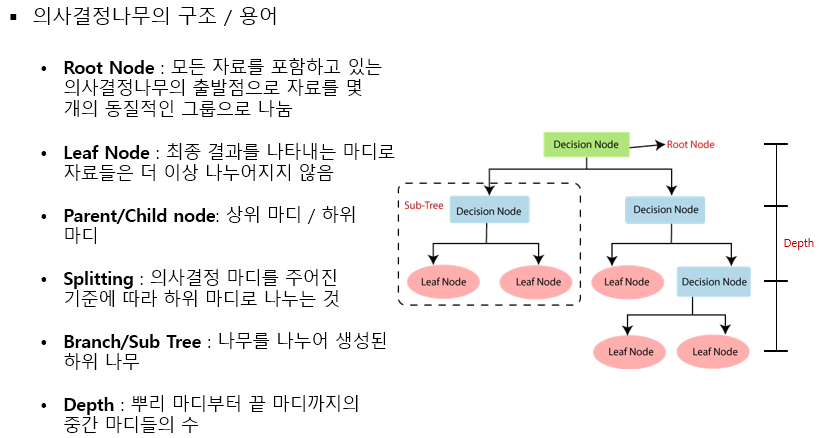

### 결정트리에서 중요한 이슈
- 데이터 세트의 피처가 결합해 규칙 조건을 만들 때마다 규칙노드가 만들어짐  
- `규칙이 많아지면` 결정 방식이 복잡해지고 `과적합(overfitting)` 발생  - 일반화시키기가 어렵다. depth 를 늘릴 수 없다면 타협을 하게 된다.
    - 즉, `depth가 길어질수록` 결정트리의 예측 성능이 저하될 가능성이 높음    
    
- 가능한 적은 결정노드로 높은 예측 정확도를 가지려면  
    - 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함  

- **`어떻게 트리를 분할할 것인가`가 중요**  
    - 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요  

 ### 결정 트리 구조
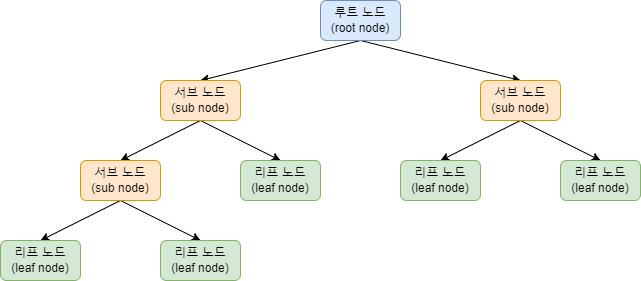

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_cfg = DecisionTreeClassifier(random_state = 42)
dt_cfg.fit(X_t_two, y_t_two)
print(dt_cfg.score(X_t_two, y_t_two)) 
print(dt_cfg.score(X_v_two, y_v_two))

1.0
1.0


- 그림으로 표현
    - sklearn의 plot_tree() 이용

[Text(0.5, 0.75, 'x[2] <= -0.277\ngini = 0.499\nsamples = 69\nvalue = [36, 33]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]')]

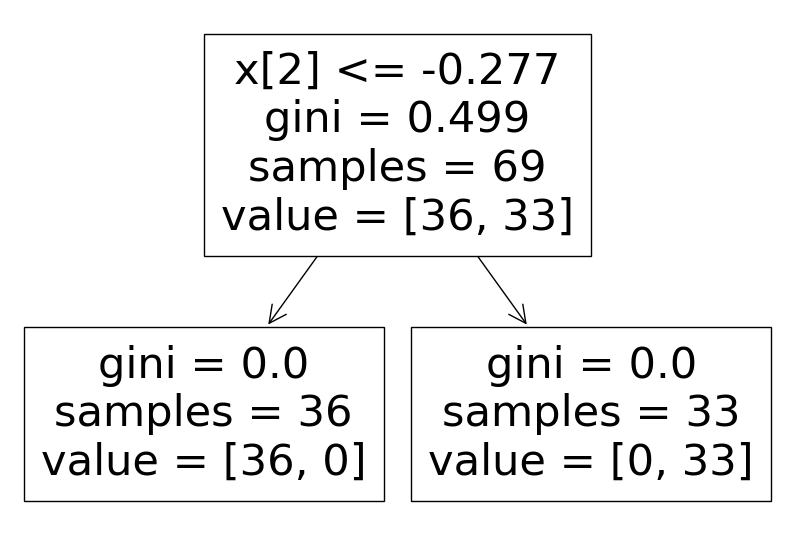

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 7))
plot_tree(dt_cfg)

- 트리 깊이를 제한해서 출력

[Text(0.5, 0.75, 'Petal Length <= -0.277\ngini = 0.499\nsamples = 69\nvalue = [36, 33]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]')]

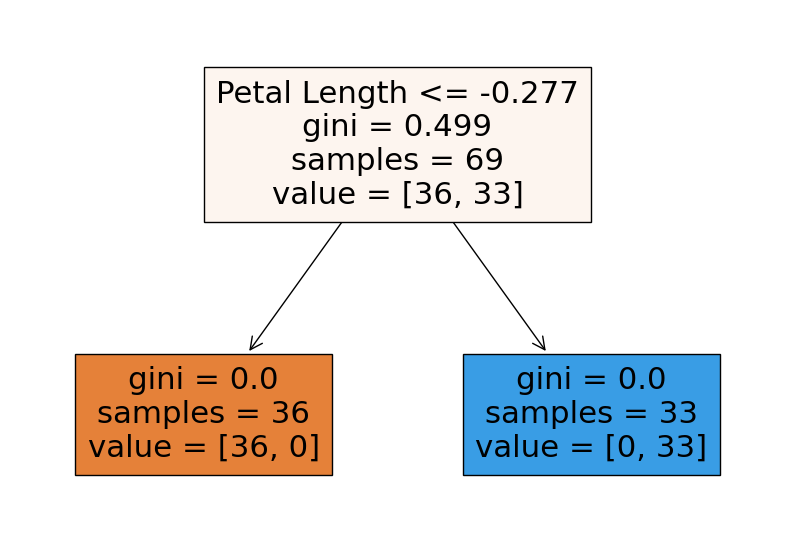

In [12]:
# filled=True 색상을 채워줌
# feature_names= [피처들] 조건 피처명을 표시해 줌
plt.figure(figsize =(10,7))
plot_tree(dt_cfg, filled = True,
         feature_names = ['Sepal Length','Sepal Width','Petal Length', 'Petal Width'])

### 그림의 정보
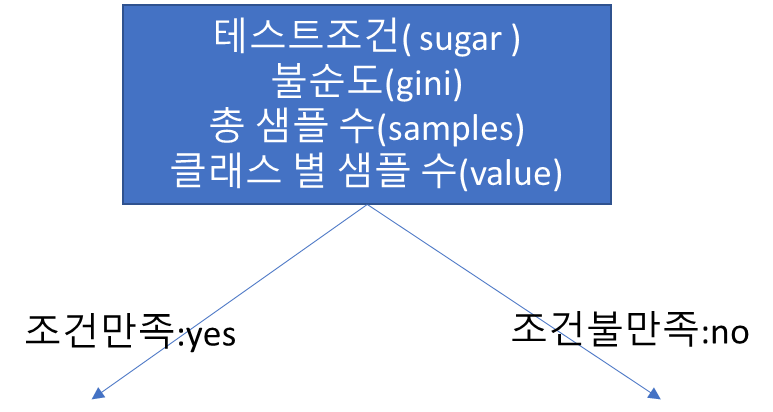

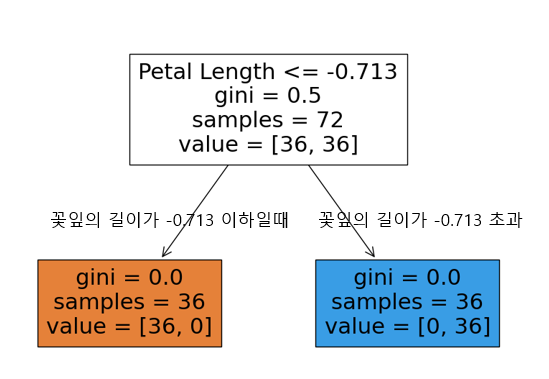

### 불순도
- gini : 지니 불순도(critertion 매개변수의 기본값), 복잡도
- critertion 매개변수 : 데이터를 분할할 기준을 정하는 것
    - 루트도느가 Petal Length <= -0.713의 기준을 세운 이유???
        - 지니불순도를 활용한 계산
            - 지니불순도 = 1- (음성클래스비율의 제곱 + 양성클래스비율의 제곱)
          
            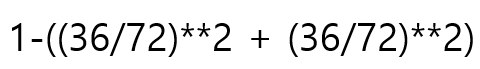

        - 지니 불순도는 두개의 클래스가 있을 때 결정값의 개수가 반반이면 0.5
            
            - 어느 한쪽의 클래스만 있으면 0 임
            
            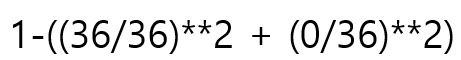
            
            - 즉, 클래스별 개수가 혼잡할 수록 불순도가 높아짐

In [13]:
1-((36/72)**2 + (36/72)**2)

0.5

In [14]:
1-((36/36)**2 + (0/36)**2)

0.0

# 기상조건에 따른 테니스 경기 참가여부 데이터를 이용한 조건 생성 예제

In [15]:
tennis = pd.read_csv('./data/tennis.csv',encoding='cp949')
# 참가에 영향을 미치는 4개의 기상 data 를 활용해서 분류 조건 생성하기
tennis.head()

,날짜,날씨,온도,습도,바람,참가여부
0,D1,맑음,더움,높음,약함,x
1,D2,맑음,더움,높음,강함,x
2,D3,흐림,더움,높음,약함,o
3,D4,비,포근,높음,약함,o
4,D5,비,서늘,정상,약함,o


In [16]:
len(tennis)

14

In [17]:
tennis[tennis['참가여부'] == 'o']

,날짜,날씨,온도,습도,바람,참가여부
2,D3,흐림,더움,높음,약함,o
3,D4,비,포근,높음,약함,o
4,D5,비,서늘,정상,약함,o
6,D7,흐림,서늘,정상,강함,o
8,D9,맑음,서늘,정상,약함,o
9,D10,비,포근,정상,약함,o
10,D11,맑음,포근,정상,강함,o
11,D12,흐림,포근,높음,강함,o
12,D13,흐림,더움,정상,약함,o


1. 전체 데이터의 클래스에 대한 지니불순도 계산

In [18]:
pos = len(tennis[tennis['참가여부'] == 'o'])
neg = len(tennis[tennis['참가여부'] == 'x'])
tot = len(tennis['참가여부'])
print(pos,neg,tot)
## 전체 데이터(root 노드)의 지니 불순도 계산
root_gini = 1 - ((pos/tot)**2 + (neg/tot)**2)

9 5 14


2. 각 컬럼별 지니 불순도 계산
- 한개의 독립변수와 클래스를 이용해 지니불순도 계산

In [19]:
# 날씨 노드의 지니 불순도 계산 - 날씨 컬럼의 범주별 참가여부를 이용해서 계산
# df.groupby([분류 기준 컬럼]) : 기준 컬럼에 따른 샘플을 분리
# groupby.그룹함수(): 그룹 요약 반환받을 수 있다.
# groupby[컬럼명].그룹함수 적용 : 그룹된 결과에 대한 컬럼별 요약이 가능.
# 날짜를 활용해서 count
tennis.groupby(['날씨', '참가여부'])['날짜'].count()
tennis.groupby(['날씨', '참가여부']).count()['날짜']

날씨  참가여부
맑음  o       2
    x       3
비   o       3
    x       2
흐림  o       4
Name: 날짜, dtype: int64

In [20]:
# 날씨 지니계수 중 맑음 범주(차지하는 비율만 계산을 해줘야 한다.)의 불순도를 확인
5/14 * (1 - ((2/5)**2 + (3/5)**2))

0.17142857142857143

In [21]:
# 날씨 계수 중 비 범주의 불순도
5/14 * (1 - ((2/5)**2 + (3/5)**2))

0.17142857142857143

In [22]:
# 날씨 계수 중 흐림 범주의 불순도
4/14 * (1 - (4/4)**2)

0.0

In [23]:
# 날씨의 불순도
weather_gini = 5/14 * (1 - ((2/5)**2 + (3/5)**2)) + 5/14 * (1 - ((2/5)**2 + (3/5)**2)) + 4/14 * (1 - (4/4)**2)
weather_gini

0.34285714285714286

In [24]:
# 온도 노드의 지니 불순도 계산
tennis.groupby(['온도','참가여부'])['날짜'].count()

온도  참가여부
더움  o       2
    x       2
서늘  o       3
    x       1
포근  o       4
    x       2
Name: 날짜, dtype: int64

In [25]:
temp_gini = 4/14*(1-((2/4)**2 + (2/4)**2)) + 4/14*(1-((3/4)**2 + (2/4)**2)) + 6/14*(1-((4/6)**2+(2/6)**2))
temp_gini 

0.38690476190476186

In [26]:
# 습도 노드의 지니 불순도 계산
tennis.groupby(['습도','참가여부'])['날짜'].count()

습도  참가여부
높음  o       3
    x       4
정상  o       6
    x       1
Name: 날짜, dtype: int64

In [27]:
hum_gini = 7/14*(1-((3/7)**2 + (4/7)**2)) + 7/14*(1-((6/7)**2 + (1/7)**2))
hum_gini 

0.3673469387755103

In [28]:
# 바람 노드의 지니 불순도 계산
tennis.groupby(['바람','참가여부'])['날짜'].count()

바람  참가여부
강함  o       3
    x       3
약함  o       6
    x       2
Name: 날짜, dtype: int64

In [29]:
wind_gini = 6/14*(1-((3/6)**2 + (3/6)**2)) + 8/14*(1-((6/8)**2 + (2/8)**2))
wind_gini 

0.42857142857142855

3. 정보이득이 큰 컬럼을 기준으로 분류
- 정보이득 : 불순도의 차이

In [30]:
print(root_gini - weather_gini) # 가장 정보이득이 크다(날씨를 기준으로 분류한다.)
print(root_gini - temp_gini)
print(root_gini - hum_gini)
print(root_gini - wind_gini)

0.11632653061224485
0.07227891156462585
0.09183673469387743
0.030612244897959162


### **위 내용을 모든 리프노드의 불순도가 0이 될때까지 2,3을 반복**

### 붖꽃 데이터를 이용한 다중 분류
- 의사결정트리 사용

In [31]:
# DecisionTree Classifier 생성
dt_cfg = DecisionTreeClassifier(random_state = 156)
dt_cfg.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

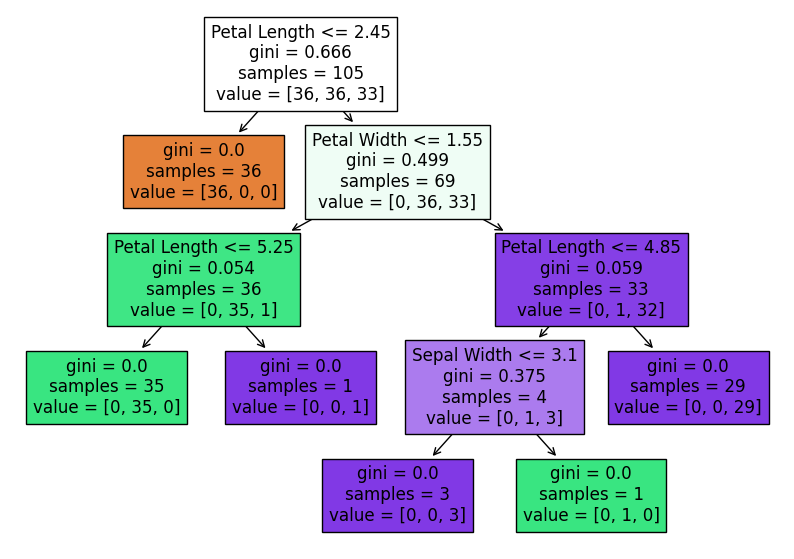

In [33]:
# filled=True 색상을 채워줌
# feature_names= [피처들] 조건 피처명을 표시해 줌
plt.figure(figsize = (10, 7))
plot_tree(dt_cfg, filled = True, feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [34]:
data = pd.read_csv("https://bit.ly/wine-date")

In [35]:
feature = data.drop('class', axis = 1)
feature

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51
...,...,...,...
6492,11.2,1.6,3.27
6493,9.6,8.0,3.15
6494,9.4,1.2,2.99
6495,12.8,1.1,3.34


In [36]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(feature, data['class'], test_size=0.3, random_state=11)

In [37]:
dt_tmp = DecisionTreeClassifier(random_state = 42)
dt_tmp.fit(X_train_1, y_train_1)

DecisionTreeClassifier(random_state=42)

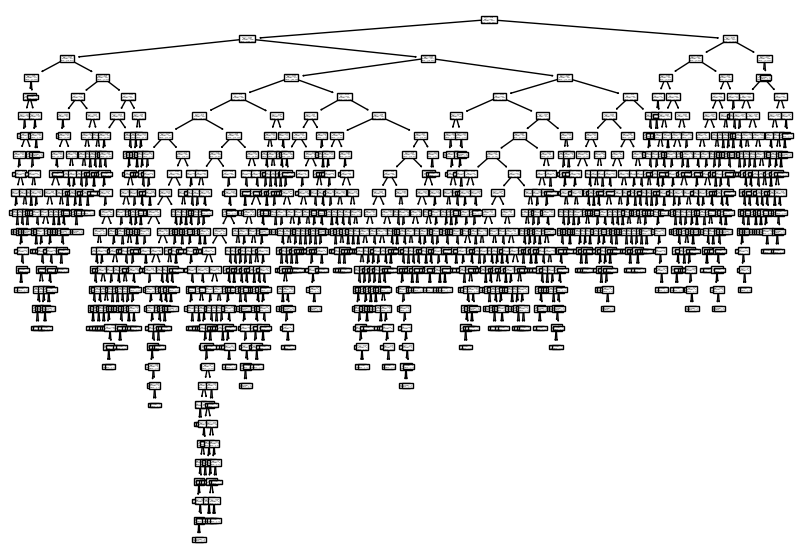

In [38]:
plt.figure(figsize = (10, 7))
plot_tree(dt_tmp)
plt.show()

- tree 는 불순도가 0이 될 때까지 반복적으로 조건을 찾는다.
    - 위와 같이 너무 많은 규칙이 생길 수 있음
    - 과대적합이 발생하기 쉬움
    - 하이퍼파라미터를 통해서 과대적합을 방지하는게 가장 큰 이슈임
        - 과대적합 방지 여부에 따라 성능의 차이가 남
            - 성능이 아주 좋은 모델은 아님

## 결정 트리 하이퍼 파라미터
- 규칙 트리는 규칙 생성 로직을 미리 제어하지 않으면
- 완벽하게 클래스 값을 구별해 내기 위해 
- 트리 노드를 계속해서 만들어가기 때문에
- 매우 복잡한 규칙 트리가 만들어져
- 모델이 쉽게 과적합되는 문제 발생
- 하이퍼 파라미터를 사용하여 복잡한 트리가 생성되지 않도록 제어
- 여러 개를 동시에 적용할 수 있다.

### 결정 트리의 하이퍼 파라미터
- max_depth : 결정 트리의 최대 트리 깊이 제어
- min_samples_split : 자식 규칙 노드를 분할해서 만드는데 필요한 최소 샘플 데이터 개수
    - min_samples_split=4로 설정하는 경우 
    - 최소 샘플 개수가 4개 필요한데
    - 3개만 있는 경우에는 더 이상 자식 규칙 노드를 위한 분할을 하지 않음
    - 트리 깊이도 줄어서 더 간결한 결정 트리 생성
- min_samples_leaf : 리프 노드가 될 수 있는 최소 샘플 개수
    - 리프 노드가 될 수 있는 조건은 디폴트로 1
    - 즉, 다른 클래스 값이 하나도 없이 단독 클래스로만 되어 있거나
    - 단 한 개의 데이터로 되어 있을 경우에 리프 노드가 될 수 있다는 것
    - min_samples_leaf 값을 키우면 더 이상 분할하지 않고, 
    - 리프 노드가 될 수 있는 조건이 완화됨
    - min_samples_leaf=4로 설정하면 
    - 샘플이 4 이하이면 리프 노드가 되기 때문에
    - 지니 계수가 크더라도 샘플이 4인 조건으로 규칙 변경되어
    - 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 됨

In [39]:
# 결정 트리 하이퍼 파라미터 튜닝
# max_depth = 2으로 조정
dt_cfg = DecisionTreeClassifier(max_depth = 2, random_state = 156)
dt_cfg.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=156)

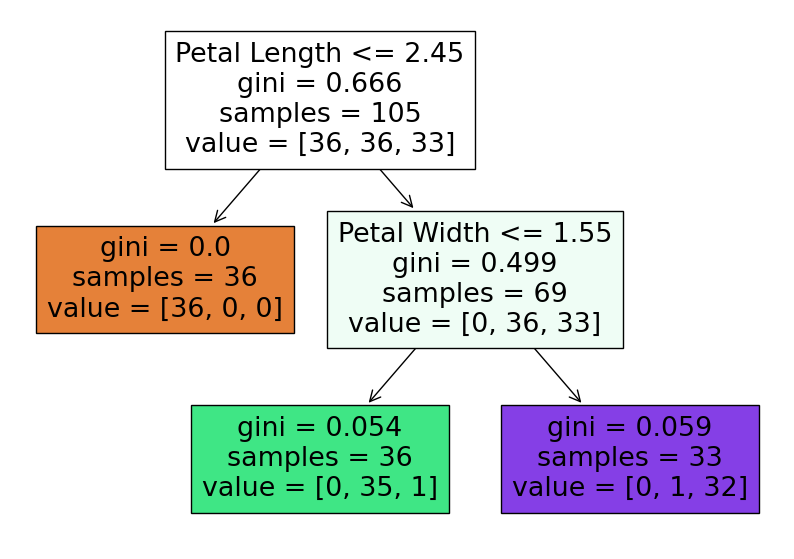

In [40]:
plt.figure(figsize = (10, 7))
plot_tree(dt_cfg, filled = True, feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

- Depth 를 제한하면 트리가 간결해짐
    - 규칙이 일반화되어졌다.

In [41]:
# 결정 트리 하이퍼 파라미터 튜닝
# min_samples_split=5로 상향 
dt_cfg = DecisionTreeClassifier(min_samples_split = 5, random_state = 156)
dt_cfg.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=156)

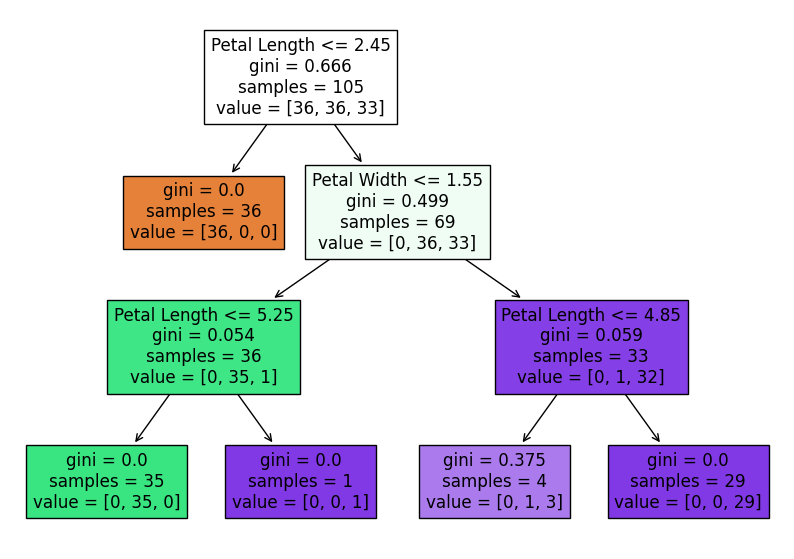

In [42]:
# 샘플이 5 이하이면 리프 노드가 되기 때문에
# 지니 계수가 크더라도 샘플이 5인 조건으로 규칙 변경되어
# 브랜치 노드가 줄어들고 결정 트리가 더 간결하게 됨
plt.figure(figsize = (10, 7))
plot_tree(dt_cfg, filled = True, feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [45]:
# leaf 노드가 최소 5개의 노드를 가지고 있어야 된다.
dt_cfg = DecisionTreeClassifier(min_samples_leaf = 5, random_state = 156)
dt_cfg.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=156)

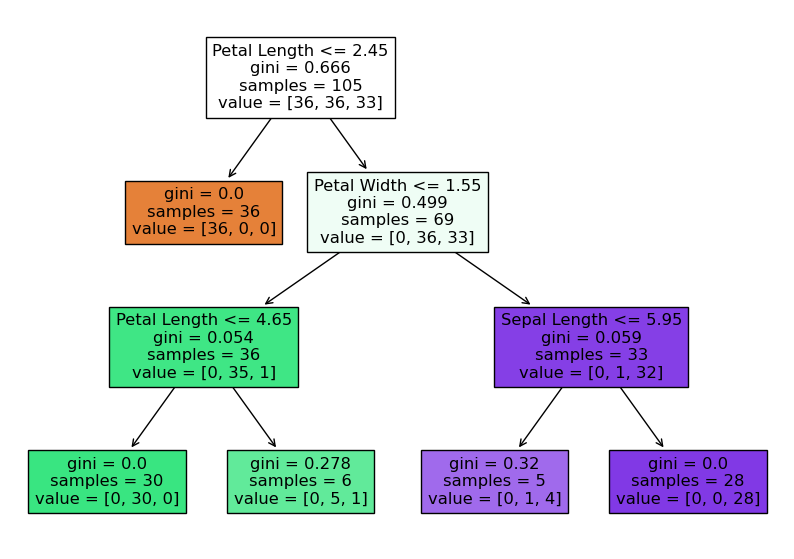

In [46]:
plt.figure(figsize = (10, 7))
plot_tree(dt_cfg, filled = True, feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

- leaf 노드의 샘플 수를 제한했기 때문에
    - 상위노드에서는 분류 규칙을 생성할 때 분할되는 양쪽노드가 leaf가 된다고 하면
        - leaf 노드의 최종 샘플 수가 5를 넘도록 규칙을 생성해야 한다.
        - 규칙이 일반화 되어진다. -> 학습데이터에 대해서는 정답이 아닌 분류가 늘어나지만 다른 데이터에 대해서는 적용의 결과가 더 효율적일 수 있다.  

### feature_importances_ 속성 (피처 중요도)
- tree를 만드는 결정에 각 피처가 얼마나 중요한지 평가
- 0과 1사이의 숫자

결정 트리는 균일도에 기반해서 어떠한 속성(피처)을 규칙 조건(어떤 열을 기준으로 하는가)로 선택하느냐가 중요한 요건  
중요한 몇 개의 피처가 명확한 규칙 트리를 만드는데 크게 기여하며  
모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있음

**`feature_importances_`** 
- ndarray 형태로 값을 반환
- 피처 순서대로 값이 할당됨
- [첫 번째 피처의 중요도, 두 번째 피처의 중요도, ....]
- 값이 높을 수록 해당 피처의 중요도가 높다는 의미
- 특정 노드의 중요도 값이 클수록, 그 노드에서 불순도가 크게 감소 의미

In [54]:
# 피처별 중요도 값 확인하고 막대 그래프로 표현
# 위 예제에서 fit()으로 학습된 DecisionTreeClassifier 객체 df_clf의 
# feature_importances_ 속성 사용

import seaborn as sns
import numpy as np
%matplotlib inline

print(iris.feature_names)
print(np.round(dt_cfg.feature_importances_,3))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.005 0.    0.537 0.458]


<Axes: >

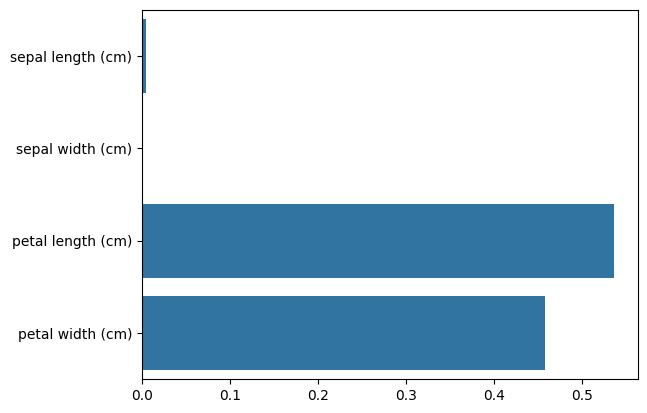

In [55]:

# feature importance를 column 별로 시각화 하기 
sns.barplot(x = dt_cfg.feature_importances_, y = iris.feature_names)

# 결과
# petal length의 피처 중요도가 가장 높음

### 결론
- iris 데이터의 품종은 꽃잎의 길이와 넓이로 분류할 수 있다.